# DURE SABIH  - MLDM TASK 4


## IMPORTING LIBRARIES AND DATA PREPROCESSING

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DCPC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DCPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DCPC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DCPC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DCPC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Preprocessing data for the bag of words model

In [11]:
# Start with some simple example text
simple_text = 'This isn\'t a real text, this is an example text...Notice this contains punctuation!!'

In [12]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)


['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [87]:
#importing the stopwords in english
stop_words = nltk.corpus.stopwords.words('english')
new_stopwords = ["food", "restaur", "u", "beach", "sand",'order']
stop_words.extend(new_stopwords)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [88]:
# Remove stopwords
cleaned_tokens = []
for word in tokenized_document:
    word = word.lower()
    if word not in stop_words:
        cleaned_tokens.append(word)
print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [89]:
# We can also remove stopwords using list comprehension
cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [90]:
# Explore lemmatization vs stemming
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos =  ['n','v','v','n','a','r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words] 

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)

Lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [91]:
# Now carry out stemming on our example sentence
stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]
print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


DEFINING A PREPROCESS FUNCTION

In [92]:
# Lets now create a function to apply all of our data preprocessing steps which we can then use on a corpus

def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove stop words
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
    return stemmed_text

## Importing & Data Exploration

In [19]:
data = pd.read_csv('tourist_accommodation_reviews.csv', encoding='cp1252')

In [20]:
# Renaming the columns
data.columns = ['ID', 'Date', 'Location',"Hotel/Restaurant","Review"]
data.head()

,ID,Date,Location,Hotel/Restaurant,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [21]:
data.shape

(53644, 5)

In [22]:
data.tail()

,ID,Date,Location,Hotel/Restaurant,Review
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."
53643,rn161212765,"Reviewed May 19, 2013",Patong,Bite in,The restaurant put in a good location in Jungc...


In [23]:
data.describe()

,ID,Date,Location,Hotel/Restaurant,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


In [24]:
data.isnull().sum()

ID                  0
Date                0
Location            0
Hotel/Restaurant    0
Review              0
dtype: int64

In [25]:
print("\n ALL DATA LABELS")
print(data.groupby("Hotel/Restaurant").count())


 ALL DATA LABELS
                                   ID  Date  Location  Review
Hotel/Restaurant                                             
+39 Italian Street Food            91    91        91      91
2gether Restaurant                100   100       100     100
3 Spices Restaurant               100   100       100     100
360 ° Bar                         100   100       100     100
44 Thaikitchen "KATA FOOD COURT"   93    93        93      93
...                               ...   ...       ...     ...
Ying Restaurant                   100   100       100     100
Yo Green Restaurant               100   100       100     100
Yorkshire Hotel Restaurant        100   100       100     100
You and Me Patong                 100   100       100     100
i-Kroon Cafe                      100   100       100     100

[537 rows x 4 columns]


In [26]:
print(data.groupby("Location").count())

                      ID   Date  Hotel/Restaurant  Review
Location                                                 
 Bang Tao Beach      600    600               600     600
 Cape Panwa         1500   1500              1500    1500
 Chalong            1287   1287              1287    1287
 Choeng Thale       3378   3378              3378    3378
 Kamala             3162   3162              3162    3162
 Karon              5826   5826              5826    5826
 Karon Beach         397    397               397     397
 Kata Beach         5752   5752              5752    5752
 Kata Noi Beach      200    200               200     200
 Kathu              1078   1078              1078    1078
 Koh Kaew            293    293               293     293
 Mai Khao           2372   2372              2372    2372
 Nai Harn            881    881               881     881
 Nai Thon             94     94                94      94
 Nai Yang            996    996               996     996
 Pa Khlok     

In [27]:
print('Unique values for Location:\n', data.Location.unique())

Unique values for Location:
 [' Kathu' ' Kata Beach' ' Rawai' ' Choeng Thale' ' Karon Beach'
 ' Phuket Town' ' Patong' ' Mai Khao' ' Karon' ' Chalong' ' Nai Harn'
 ' Cape Panwa' ' Sakhu' ' Pa Khlok' ' Kamala' ' Bang Tao Beach'
 ' Thalang District' ' Talat Nuea' ' Kata Noi Beach' ' Wichit' ' Nai Yang'
 ' Talat Yai' ' Koh Kaew' ' Nai Thon' ' Ratsada']


In [28]:
# filtering the rows for 3 locations
Patong = data[data['Location'].str.contains('Patong')]

Phuket = data[data['Location'].str.contains('Phuket Town')]

Chalong = data[data['Location'].str.contains('Chalong')]


In [29]:
Patong.describe()

,ID,Date,Location,Hotel/Restaurant,Review
count,16403,16403,16403,16403,16403
unique,15112,1786,1,164,15111
top,rn292481886,Reviewed 1 week ago,Patong,No.6 Restaurant,The girls working (?) here seemed more interes...
freq,10,226,16403,200,10


In [30]:
Phuket.describe()

,ID,Date,Location,Hotel/Restaurant,Review
count,3356,3356,3356,3356,3356
unique,3126,1367,1,34,3126
top,rn545866943,Reviewed 2 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Visited this restaurant with a party of 8 whic...
freq,6,43,3356,100,6


In [31]:
Chalong.describe()

,ID,Date,Location,Hotel/Restaurant,Review
count,1287,1287,1287,1287,1287
unique,1197,770,1,13,1197
top,rn556021496,"Reviewed January 12, 2018",Chalong,Flavor Phuket,"The place is, may be, nice for eating fine ita..."
freq,5,8,1287,100,5


Converting Hotels column into a list of Unique values,
defining a for loop to iteraate through the hotels with maximum count of reviews
Creating a new dataframe for hotel names and review counts to sort and select in the next step
sorting values by descending count for the head of 10 values each (x3)

In [32]:
reviews = []
for i in Patong["Hotel/Restaurant"].unique().tolist():
    reviews.append(Patong[Patong["Hotel/Restaurant"] == i]["Review"].count())

dfReviews = pd.concat([pd.Series(Patong["Hotel/Restaurant"].unique().tolist(), name = "Hotel"), pd.Series(reviews, name = "Reviews count")], axis = 1)

dfReviews = dfReviews.sort_values(by = "Reviews count", ascending = False).head(10)

df1 = pd.DataFrame()
for i in dfReviews.Hotel.tolist():
    df1 = pd.concat([df1, Patong[Patong["Hotel/Restaurant"] == i]], axis = 0)

In [33]:
df1.describe()

,ID,Date,Location,Hotel/Restaurant,Review
count,1187,1187,1187,1187,1187
unique,1107,658,1,10,1107
top,rn570737159,Reviewed 1 week ago,Patong,No.6 Restaurant,Fantastic food and a great host (Christian) gr...
freq,6,19,1187,200,6


In [34]:
reviews = []
for i in Phuket["Hotel/Restaurant"].unique().tolist():
    reviews.append(Phuket[Phuket["Hotel/Restaurant"] == i]["Review"])

dfReviews = pd.concat([pd.Series(Phuket["Hotel/Restaurant"].unique().tolist(), name = "Hotel"), pd.Series(reviews)], axis = 1)

dfReviews = dfReviews.head(10)

df2 = pd.DataFrame()
for i in dfReviews.Hotel.tolist():
    df2 = pd.concat([df2, Phuket[Phuket["Hotel/Restaurant"] == i]], axis = 0)

In [35]:
df2.describe()

,ID,Date,Location,Hotel/Restaurant,Review
count,986,986,986,986,986
unique,956,571,1,10,956
top,rn574872252,Reviewed 2 weeks ago,Phuket Town,Surf and Turf by Soul Kitchen,Our family continuing to search for the best p...
freq,3,21,986,100,3


In [36]:

reviews = []
for i in Chalong["Hotel/Restaurant"].unique().tolist():
    reviews.append(Chalong[Chalong["Hotel/Restaurant"] == i]["Review"])

dfReviews = pd.concat([pd.Series(Chalong["Hotel/Restaurant"].unique().tolist(), name = "Hotel"), pd.Series(reviews)], axis = 1)

dfReviews = dfReviews.head(10)

df3 = pd.DataFrame()
for i in dfReviews.Hotel.tolist():
    df3 = pd.concat([df3, Chalong[Chalong["Hotel/Restaurant"] == i]], axis = 0)

In [37]:
df3.describe()

,ID,Date,Location,Hotel/Restaurant,Review
count,995,995,995,995,995
unique,975,670,1,10,975
top,rn581329448,"Reviewed January 1, 2018",Chalong,Flavor Phuket,This restaurant is in one word amazing. It’s a...
freq,3,7,995,100,3


In [38]:
print('Unique values of Hotel names Patong\n', df1.groupby("Hotel/Restaurant").count())

Unique values of Hotel names Patong
                                                     ID  Date  Location  Review
Hotel/Restaurant                                                              
99 Seafood                                         100   100       100     100
Baan Rim Pa Patong                                 100   100       100     100
Da Mario                                           187   187       187     187
Da Maurizio Beach Side                             100   100       100     100
Don's Bar B Q                                      100   100       100     100
Full Moon Brewworks - Microbrewery & Lobs n' Roll  100   100       100     100
Joe's Downstairs                                   100   100       100     100
No.6 Restaurant                                    200   200       200     200
Pizzeria Hut 1                                     100   100       100     100
Spoon Cafe                                         100   100       100     100


In [39]:
print('Unique values of Hotel names in Phuket \n', df2.groupby("Hotel/Restaurant").count())

Unique values of Hotel names in Phuket 
                                      ID  Date  Location  Review
Hotel/Restaurant                                               
Beach Bar                           100   100       100     100
Blue Elephant Phuket                100   100       100     100
Honeymoon Thai Restaurant by Kenya   94    94        94      94
Kopitiam by Wilai                   100   100       100     100
Mor Mu Dong                          92    92        92      92
Mr.Coffee                           100   100       100     100
OSOT                                100   100       100     100
Song Pee Nong 2                     100   100       100     100
Suay Restaurant                     100   100       100     100
Surf and Turf by Soul Kitchen       100   100       100     100


In [40]:
print('Unique values of Hotel names in Chalong\n', df3.groupby("Hotel/Restaurant").count())

Unique values of Hotel names in Chalong
                                          ID  Date  Location  Review
Hotel/Restaurant                                                   
Baan Noy Restaurant                     100   100       100     100
Fatty's                                 100   100       100     100
Flavor Phuket                           100   100       100     100
Happy Days                              100   100       100     100
Kan Eang 2                              100   100       100     100
Kan Eang@Pier Restaurant                100   100       100     100
Mamma Mia Grill & Restaurant Bangtao     95    95        95      95
Pizzeria AGLI AMICI da Michele & Jimmy  100   100       100     100
Pure Vegan Heaven                       100   100       100     100
Shah Baba Indian Restaurant             100   100       100     100


# SENTIMENT ANALYSIS

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
print(sentiment.polarity_scores('This movie is great'))
print(sentiment.polarity_scores('This movie is not great'))


{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


For ease change dataframe name to reviews1, reviews2, reviews 3

In [42]:
reviews1 = df1  # Patong
reviews2 = df2  # Phuket
reviews3 = df3  # Chalong

In [43]:
# For Patong
reviews1['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews1['Review']]
reviews1['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews1['Review']]
reviews1['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews1['Review']]
reviews1['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews1['Review']]


In [44]:
# For Phuket 
reviews2['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews2['Review']]
reviews2['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews2['Review']]
reviews2['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews2['Review']]
reviews2['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews2['Review']]


In [45]:
# For Chalong
reviews3['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews3['Review']]
reviews3['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews3['Review']]
reviews3['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews3['Review']]
reviews3['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews3['Review']]

In [46]:
reviews1[['compound', 'neg', 'neu', 'pos']].describe()
#compound score --> range of sentiment -1 to 1 

,compound,neg,neu,pos
count,1187.000000,1187.000000,1187.000000,1187.000000
mean,0.598559,0.031710,0.756602,0.211699
std,0.457384,0.056228,0.122600,0.130739
min,-0.962300,0.000000,0.298000,0.000000
25%,0.463800,0.000000,0.677000,0.112500
50%,0.812600,0.000000,0.761000,0.200000
75%,0.915050,0.050000,0.844000,0.295000
max,0.987200,0.373000,1.000000,0.698000


In [47]:
reviews2[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,986.000000,986.000000,986.000000,986.000000
mean,0.702753,0.020411,0.738565,0.241027
std,0.363403,0.038828,0.131382,0.136765
min,-0.870800,0.000000,0.287000,0.000000
25%,0.624900,0.000000,0.651250,0.141000
50%,0.856300,0.000000,0.745000,0.238000
75%,0.931275,0.035000,0.833000,0.328000
max,0.990400,0.292000,1.000000,0.713000


In [48]:
reviews3[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,995.000000,995.000000,995.000000,995.000000
mean,0.690468,0.027308,0.730186,0.242523
std,0.397597,0.050304,0.122476,0.129489
min,-0.905100,0.000000,0.303000,0.000000
25%,0.658850,0.000000,0.645000,0.144000
50%,0.853200,0.000000,0.734000,0.238000
75%,0.928650,0.042000,0.817000,0.324500
max,0.989700,0.384000,1.000000,0.697000


<AxesSubplot:xlabel='compound', ylabel='Count'>

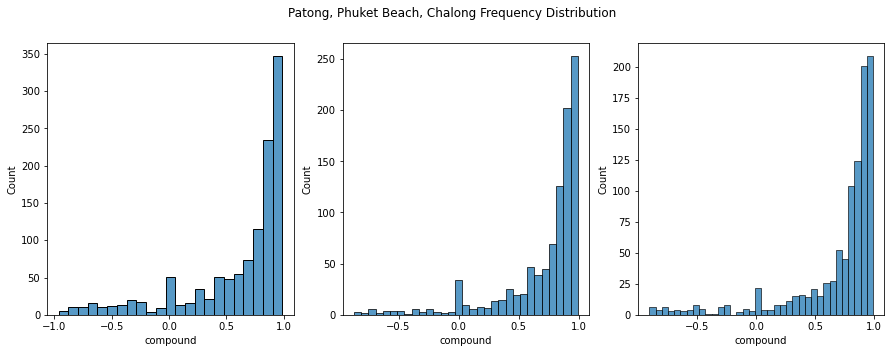

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 
fig.suptitle('Patong, Phuket Beach, Chalong Frequency Distribution')
sns.histplot(ax=axes[0], x=reviews1['compound'])
sns.histplot(ax=axes[1], x= reviews2['compound'])
sns.histplot(ax=axes[2], x=reviews3['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

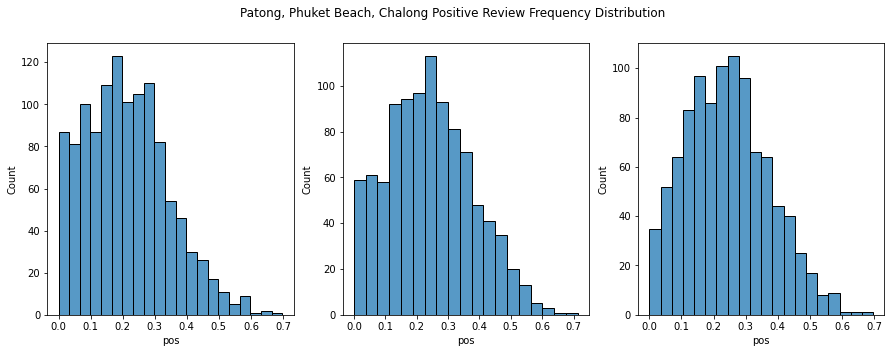

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Patong, Phuket Beach, Chalong Positive Review Frequency Distribution')
sns.histplot(ax=axes[0], x=reviews1['pos'])
sns.histplot(ax=axes[1], x= reviews2['pos'])
sns.histplot(ax=axes[2], x=reviews3['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

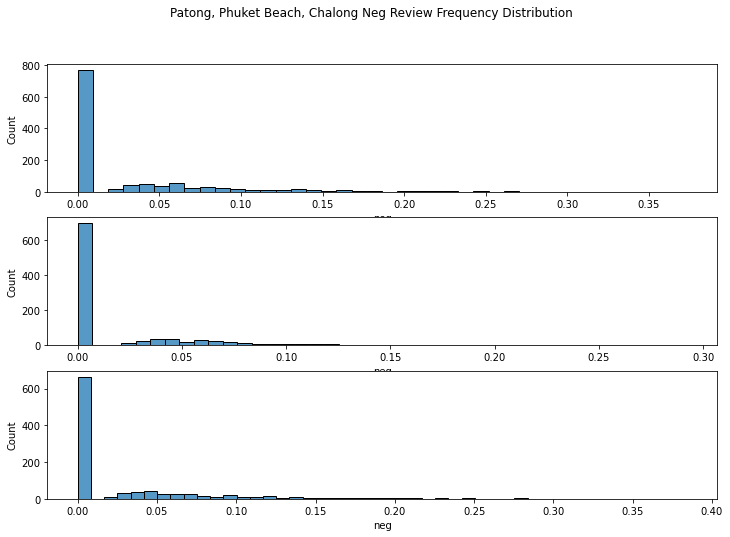

In [51]:
fig, axes = plt.subplots(3,1, figsize=(12,8)) 
fig.suptitle('Patong, Phuket Beach, Chalong Neg Review Frequency Distribution')
sns.histplot(ax=axes[0], x=reviews1['neg'])
sns.histplot(ax=axes[1], x= reviews2['neg'])
sns.histplot(ax=axes[2], x=reviews3['neg'])

## Look at how many negative reviews we have per hotel

In [52]:
(reviews1['compound']<=0).groupby(reviews1['Hotel/Restaurant']).sum().sort_values(ascending= False)

Hotel/Restaurant
Da Mario                                             35
Spoon Cafe                                           27
99 Seafood                                           23
No.6 Restaurant                                      18
Pizzeria Hut 1                                       15
Full Moon Brewworks - Microbrewery & Lobs n' Roll    13
Da Maurizio Beach Side                               11
Don's Bar B Q                                        10
Baan Rim Pa Patong                                    9
Joe's Downstairs                                      9
Name: compound, dtype: int64

In [53]:
(reviews2['compound']<=0).groupby(reviews2['Hotel/Restaurant']).sum().sort_values(ascending= False)

Hotel/Restaurant
Beach Bar                             14
Song Pee Nong 2                       11
Honeymoon Thai Restaurant by Kenya    10
Kopitiam by Wilai                     10
Mor Mu Dong                           10
Mr.Coffee                              7
Suay Restaurant                        7
Surf and Turf by Soul Kitchen          5
Blue Elephant Phuket                   4
OSOT                                   3
Name: compound, dtype: int64

In [54]:
(reviews3['compound']<=0).groupby(reviews3['Hotel/Restaurant']).sum().sort_values(ascending= False)

Hotel/Restaurant
Kan Eang 2                                14
Kan Eang@Pier Restaurant                  13
Fatty's                                   10
Happy Days                                 9
Mamma Mia Grill & Restaurant Bangtao       9
Shah Baba Indian Restaurant                9
Pizzeria AGLI AMICI da Michele & Jimmy     7
Flavor Phuket                              6
Pure Vegan Heaven                          6
Baan Noy Restaurant                        4
Name: compound, dtype: int64

## Calculate as a % of total Reviews

The number of negative reviews for each product doesn’t tell us much unless we know how many reviews there are in total for each one. So we should look at the number of negative reviews as a proportion of the total number of review for that produc

classification -- > cheap
Senti ---> computationaly expensive and time consuming 

In [55]:
patong_percent_positive = pd.DataFrame((reviews1['compound']>=0).groupby(reviews1['Hotel/Restaurant']).sum()
                                  /reviews1['Review'].groupby(reviews1['Hotel/Restaurant']).count()*100,
                                  columns = ['% Positive Reviews']).sort_values(by='% Positive Reviews')
patong_percent_positive

,% Positive Reviews
Hotel/Restaurant,
Spoon Cafe,77.000000
99 Seafood,78.000000
Da Mario,87.165775
Pizzeria Hut 1,89.000000
Full Moon Brewworks - Microbrewery & Lobs n' Roll,90.000000
Da Maurizio Beach Side,91.000000
Joe's Downstairs,92.000000
No.6 Restaurant,93.000000
Baan Rim Pa Patong,94.000000


In [56]:
Patong_percent_negative = pd.DataFrame((reviews1['compound']<=0).groupby(reviews1['Hotel/Restaurant']).sum()
                                  /reviews1['Review'].groupby(reviews1['Hotel/Restaurant']).count()*100,
                                  columns = ['% Negative reviews']).sort_values(by='% Negative reviews')
Patong_percent_negative

,% Negative reviews
Hotel/Restaurant,
Baan Rim Pa Patong,9.000000
Joe's Downstairs,9.000000
No.6 Restaurant,9.000000
Don's Bar B Q,10.000000
Da Maurizio Beach Side,11.000000
Full Moon Brewworks - Microbrewery & Lobs n' Roll,13.000000
Pizzeria Hut 1,15.000000
Da Mario,18.716578
99 Seafood,23.000000


In [57]:
Phuket_percent_positive = pd.DataFrame((reviews2['compound']>=0).groupby(reviews2['Hotel/Restaurant']).sum()
                                  /reviews2['Review'].groupby(reviews2['Hotel/Restaurant']).count()*100,
                                  columns = ['% Positive Reviews']).sort_values(by='% Positive Reviews')
Phuket_percent_positive



,% Positive Reviews
Hotel/Restaurant,
Beach Bar,89.000000
Mor Mu Dong,91.304348
Song Pee Nong 2,93.000000
Honeymoon Thai Restaurant by Kenya,93.617021
Mr.Coffee,95.000000
Surf and Turf by Soul Kitchen,95.000000
Kopitiam by Wilai,97.000000
Suay Restaurant,97.000000
Blue Elephant Phuket,99.000000


In [58]:
Phuket_percent_negative = pd.DataFrame((reviews2['compound']<=0).groupby(reviews2['Hotel/Restaurant']).sum()
                                  /reviews2['Review'].groupby(reviews2['Hotel/Restaurant']).count()*100,
                                  columns = ['% Negative reviews']).sort_values(by='% Negative reviews')
Phuket_percent_negative

,% Negative reviews
Hotel/Restaurant,
OSOT,3.000000
Blue Elephant Phuket,4.000000
Surf and Turf by Soul Kitchen,5.000000
Mr.Coffee,7.000000
Suay Restaurant,7.000000
Kopitiam by Wilai,10.000000
Honeymoon Thai Restaurant by Kenya,10.638298
Mor Mu Dong,10.869565
Song Pee Nong 2,11.000000


In [59]:
Chalong_percent_positive = pd.DataFrame((reviews3['compound']>=0).groupby(reviews3['Hotel/Restaurant']).sum()
                                  /reviews3['Review'].groupby(reviews3['Hotel/Restaurant']).count()*100,
                                  columns = ['% Positive Reviews']).sort_values(by='% Positive Reviews')
Chalong_percent_positive



,% Positive Reviews
Hotel/Restaurant,
Kan Eang 2,88.000000
Kan Eang@Pier Restaurant,88.000000
Fatty's,92.000000
Happy Days,92.000000
Mamma Mia Grill & Restaurant Bangtao,92.631579
Shah Baba Indian Restaurant,94.000000
Pizzeria AGLI AMICI da Michele & Jimmy,95.000000
Baan Noy Restaurant,96.000000
Flavor Phuket,96.000000


In [60]:
Chalong_percent_negative = pd.DataFrame((reviews3['compound']<=0).groupby(reviews3['Hotel/Restaurant']).sum()
                                  /reviews3['Review'].groupby(reviews3['Hotel/Restaurant']).count()*100,
                                  columns = ['% Negative reviews']).sort_values(by='% Negative reviews')
Chalong_percent_negative

,% Negative reviews
Hotel/Restaurant,
Baan Noy Restaurant,4.000000
Flavor Phuket,6.000000
Pure Vegan Heaven,6.000000
Pizzeria AGLI AMICI da Michele & Jimmy,7.000000
Happy Days,9.000000
Shah Baba Indian Restaurant,9.000000
Mamma Mia Grill & Restaurant Bangtao,9.473684
Fatty's,10.000000
Kan Eang@Pier Restaurant,13.000000


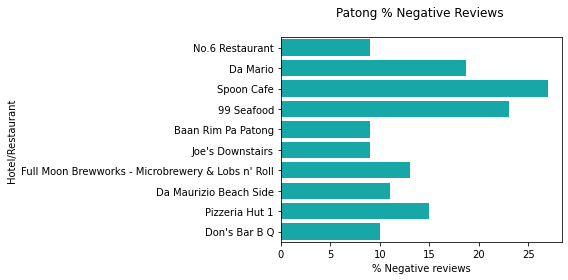

In [61]:
import matplotlib.pylab as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 4.0]
plt.rcParams["figure.autolayout"] = True
plt.title('Patong % Negative Reviews \n')
plot = sns.barplot(data= Patong_percent_negative, x='% Negative reviews', y=Patong_percent_negative.index, color='c', order=pd.value_counts(reviews1['Hotel/Restaurant']).iloc[:10].index)
fontsize = 24
plt.show()

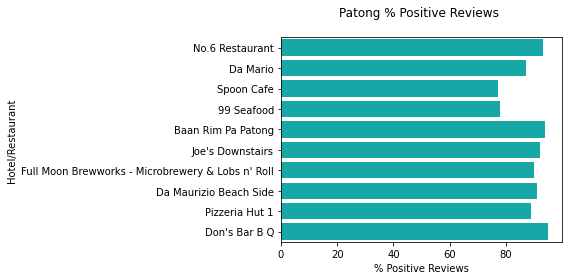

In [62]:
plt.rcParams["figure.figsize"] = [8.00, 4.0]
plt.rcParams["figure.autolayout"] = True
plt.title('Patong % Positive Reviews \n')
plot = sns.barplot(data= patong_percent_positive, x='% Positive Reviews', y= patong_percent_positive.index, color='c', order=pd.value_counts(reviews1['Hotel/Restaurant']).iloc[:10].index)
fontsize = 24
plt.show()

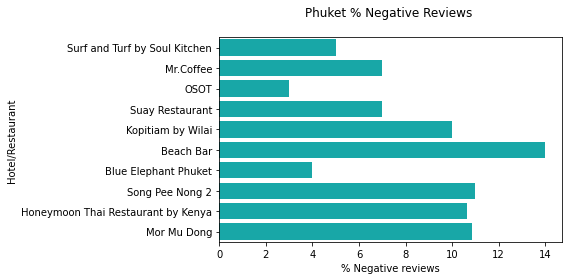

In [63]:
plt.rcParams["figure.figsize"] = [8.00, 4.0]
plt.rcParams["figure.autolayout"] = True
plt.title('Phuket % Negative Reviews \n')
plot = sns.barplot(data=Phuket_percent_negative, x='% Negative reviews', y=Phuket_percent_negative.index, color='c', order=pd.value_counts(reviews2['Hotel/Restaurant']).iloc[:30].index)
fontsize = 24
plt.show()

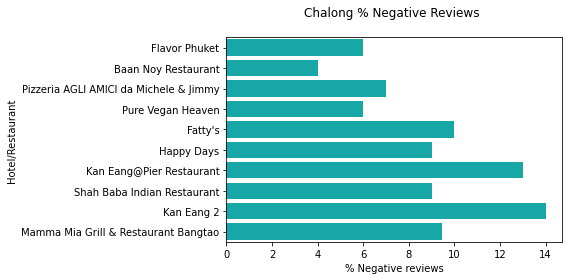

In [64]:
plt.rcParams["figure.figsize"] = [8.00, 4.0]
plt.rcParams["figure.autolayout"] = True
plt.title('Chalong % Negative Reviews \n')
plot = sns.barplot(data=Chalong_percent_negative, x='% Negative reviews', y=Chalong_percent_negative.index, color='c', order=pd.value_counts(reviews3['Hotel/Restaurant']).iloc[:30].index)
fontsize = 24
plt.show()

## Applying Preprocess text function to convert the raw text into processed form

In [65]:
reviews1['processed_review'] = reviews1['Review'].apply(preprocess_text)
reviews2['processed_review'] = reviews2['Review'].apply(preprocess_text)
reviews3['processed_review'] = reviews3['Review'].apply(preprocess_text)

### Creating subsets for Positive and Negative reviews in all locations  
### for use in wordcloud

In [66]:
# What are the positive reviews for Highest Positive in Patong
Pat_pos = reviews1.loc[(reviews1['Hotel/Restaurant'] == "Don's Bar B Q")  & (reviews1['compound']>0),:]

In [67]:
# positive reviews for Highest Positive in Phuket
Phu_pos = reviews2.loc[(reviews2['Hotel/Restaurant']== "OSOT") & (reviews2['compound']>0),:]

In [100]:
# positive reviews for Highest Positive in Chalong
Cha_pos = reviews3.loc[(reviews3['Hotel/Restaurant']== "Baan Noy Restaurant")& (reviews3['compound']>0),:]

In [101]:
# Negative reviews about the Worst Rated Performing Hotel in Patong
Pat_neg = reviews1.loc[(reviews1['Hotel/Restaurant']=="Spoon Cafe") & (reviews1['compound']<0),:]

In [102]:
#Negative reviews about Worst Rated Performing Hotel in Phuket
Phu_neg = reviews2.loc[(reviews2['Hotel/Restaurant']=='Beach Bar')     & (reviews2['compound']<0),:]

In [103]:
#Negative reviews about Worst Rated Performing Hotel in Chalong
Cha_neg = reviews3.loc[(reviews3['Hotel/Restaurant']=='Kan Eang 2')
                                     & (reviews3['compound']<0),:]

In [104]:
Pat_pos['Review'][:15]

30350    marinated meat has never quite been my thing, ...
30351    We visit as a family group. Staff are friendly...
30352    First time at Dons, and surely not the last. T...
30353    I’ve tried Don BBQ buffet in the weekend days ...
30355    We've been to this place again and again. It's...
30356    I really enjoyed my meal at Don's. They have l...
30357    This was my first time to Don"s BBQ.... Sunday...
30358    BBQ place, great food and well priced, have to...
30359    Well away from the hubbub. Was a great place t...
30361    Visited Don's BBQ as a party of 4 Adults and 2...
30362    what can i say about don,s bbq. well on a satu...
30363    Don's BBQ is the best place in patong for good...
30364    Brilliant! So much choice and they don't skimp...
30365    I eat here every time I come to Patong It is a...
30366    Went to the all you can eat BBQ on a Saturday ...
Name: Review, dtype: object

In [105]:
Pat_neg.head()

,ID,Date,Location,Hotel/Restaurant,Review,compound,neg,neu,pos,processed_review
50030,rn532739188,"Reviewed October 13, 2017",Patong,Spoon Cafe,What a shame!\r\nMy partner ended up with food...,-0.6832,0.220,0.668,0.113,"[shame, partner, end, poison, ate, fish, burge..."
50033,rn512059339,"Reviewed August 12, 2017",Patong,Spoon Cafe,Although I tend to frown on people who go to T...,-0.2960,0.052,0.948,0.000,"[although, tend, frown, peopl, go, thailand, w..."
50035,rn509158554,"Reviewed August 5, 2017",Patong,Spoon Cafe,Called in with a large group of friends for lu...,-0.0451,0.120,0.744,0.136,"[call, larg, group, friend, lunch, servic, bad..."
50037,rn504668819,"Reviewed July 23, 2017",Patong,Spoon Cafe,We went for late brunch but finished already b...,-0.3331,0.151,0.755,0.094,"[went, late, brunch, finish, alreadi, 12pm, go..."
50045,rn476721824,"Reviewed April 18, 2017",Patong,Spoon Cafe,"Ordered Italian Pasta and Pad Thai Noodles, th...",-0.2960,0.050,0.950,0.000,"[order, italian, pasta, pad, thai, noodl, dish..."


In [106]:
Phu_neg.head()

,ID,Date,Location,Hotel/Restaurant,Review,compound,neg,neu,pos,processed_review
10813,rn569407720,"Reviewed March 28, 2018",Phuket Town,Beach Bar,They did a great job with marketing. Well pave...,-0.0880,0.071,0.845,0.084,"[great, job, market, well, pave, access, road,..."
10821,rn543598417,"Reviewed November 27, 2017",Phuket Town,Beach Bar,"Just been for the first time with my husband, ...",-0.2554,0.059,0.904,0.037,"[first, time, husband, sever, time, highli, ra..."
10859,rn365341972,"Reviewed April 19, 2016",Phuket Town,Beach Bar,Had read this on James Phuket Blog and went on...,-0.2057,0.065,0.887,0.048,"[read, jame, phuket, blog, went, recommend, gu..."
10865,rn353813018,"Reviewed March 8, 2016",Phuket Town,Beach Bar,This place will not be for everyone's taste. I...,-0.7269,0.124,0.876,0.000,"[place, everyone', tast, one, ye, floor, apart..."
10870,rn351206695,"Reviewed February 26, 2016",Phuket Town,Beach Bar,Ate there 3 times - mostly ok but on the last ...,-0.8582,0.278,0.673,0.049,"[ate, 3, time, mostli, ok, last, occas, serv, ..."


In [107]:
Cha_neg.head()

,ID,Date,Location,Hotel/Restaurant,Review,compound,neg,neu,pos,processed_review
39229,rn577874907,Reviewed 2 weeks ago,Chalong,Kan Eang 2,seafood is very freah you can select by your s...,-0.5216,0.118,0.822,0.060,"[seafood, freah, select, salf, depress, king, ..."
39230,rn574661050,Reviewed 4 weeks ago,Chalong,Kan Eang 2,"Rude staff, threw my coconut on the far end of...",-0.7845,0.200,0.754,0.047,"[rude, staff, threw, coconut, far, end, tabl, ..."
39232,rn560378887,"Reviewed February 14, 2018",Chalong,Kan Eang 2,10 of us wanted to having lunch in this restau...,-0.1154,0.059,0.870,0.071,"[10, us, want, lunch, restaur, waitress, face,..."
39238,rn551130239,"Reviewed January 3, 2018",Chalong,Kan Eang 2,Nice restaurant direct on the sea\r\nGood view...,-0.5182,0.235,0.604,0.162,"[nice, restaur, direct, sea, good, view, flair..."
39274,rn365003632,"Reviewed April 17, 2016",Chalong,Kan Eang 2,For one who frequents Phuket no less than 6 ti...,-0.8459,0.213,0.730,0.057,"[one, frequent, phuket, less, 6, time, boat, s..."


# We can use a Wordcloud to visualise Positive and Negative

<function matplotlib.pyplot.show(close=None, block=None)>

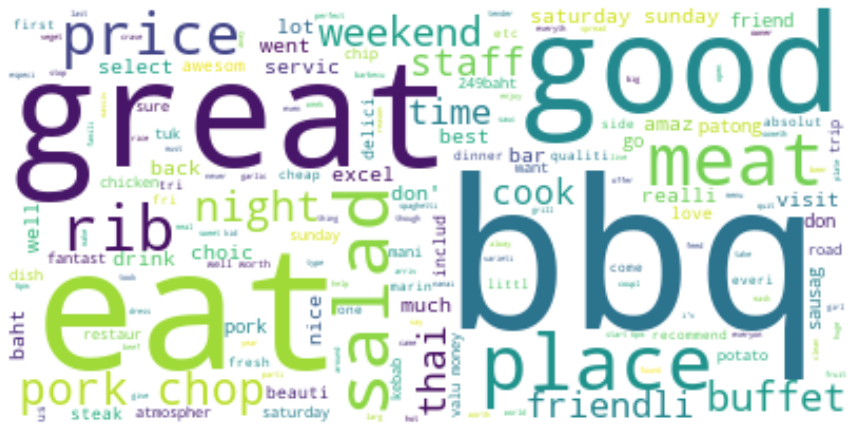

In [108]:
# positive reviews for Patong Hotel
pos_tokens1 = [word for review in Pat_pos['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(
'  '.join(pos_tokens1))
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

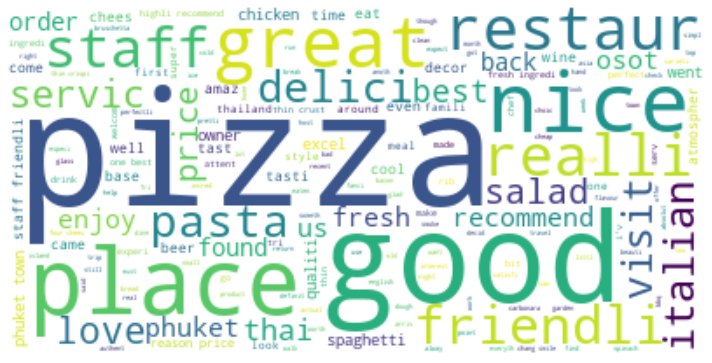

In [109]:
# positive reviews for Phuket
pos_tokens2 = [word for review in Phu_pos['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(
'  '.join(pos_tokens2))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

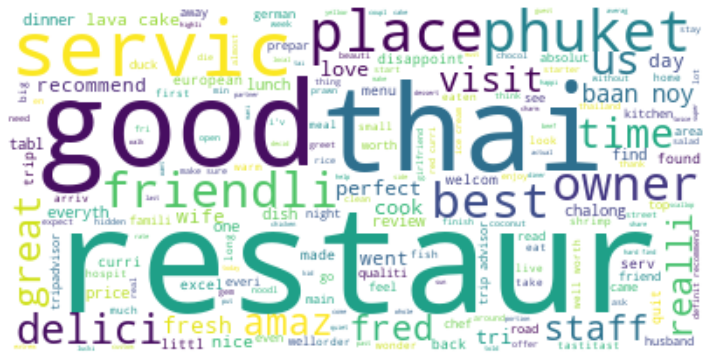

In [110]:
# positive reviews for Chalong
pos_tokens3 = [word for review in Cha_pos['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(
'  '.join(pos_tokens3))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

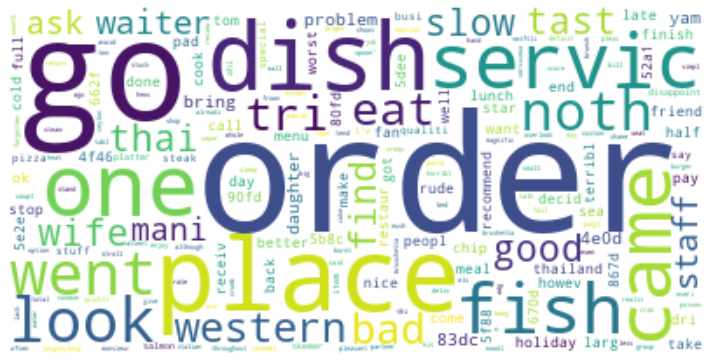

In [111]:
#Negative reviews for patong
neg_tokens1 = [word for review in Pat_neg['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text('  '.join(neg_tokens1))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

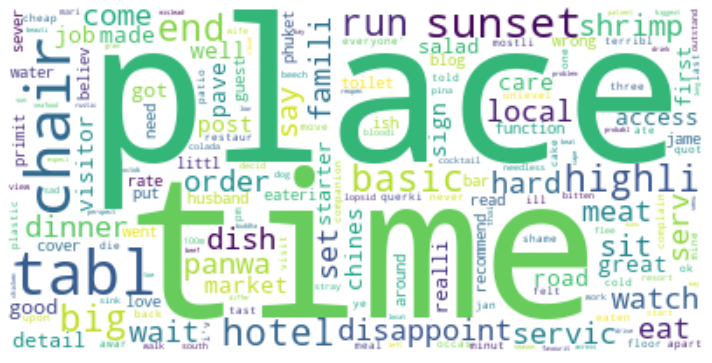

In [112]:
# Negative reviews Phuket
neg_tokens2 = [word for review in Phu_neg['processed_review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text('  '.join(neg_tokens2))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

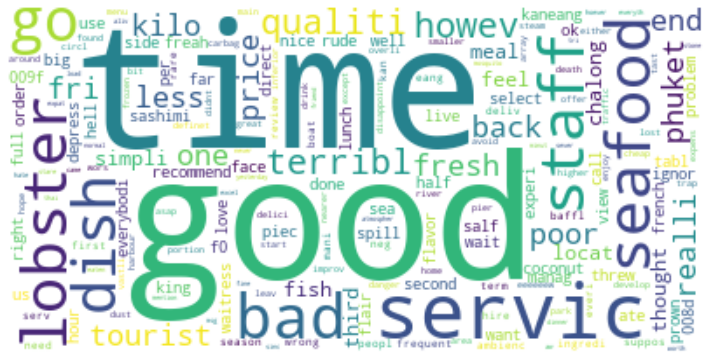

In [113]:
# Negative reviews Chalong
neg_tokens3 = [word for review in Cha_neg['processed_review'] for word in review if word != 'restaur']
wordcloud = WordCloud(background_color='white').generate_from_text('  '.join(neg_tokens3))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [114]:
#wordcloud can be difficult to interpred hence Frequency Dist 
#is utilized 
print('\n Positive \n\n Freq Dist for Patong \n')
pos_freqdist1 = FreqDist(pos_tokens1)
pos_freqdist1.tabulate(10)

print('\n')
print(' Freq Dist for Phuket\n')

pos_freqdist2 = FreqDist(pos_tokens2)
pos_freqdist2.tabulate(10)
print('\n')

print('Freq Dist for Chalong \n')
pos_freqdist3 = FreqDist(pos_tokens3)
pos_freqdist3.tabulate(10)


 Positive 

 Freq Dist for Patong 

  bbq   eat great  good place salad  meat  pork  chop   rib 
   69    44    37    31    30    29    28    26    20    20 


 Freq Dist for Phuket

   pizza     good    place     nice    staff friendli    great  restaur   realli    price 
      90       50       44       38       28       28       27       24       21       20 


Freq Dist for Chalong 

 restaur     thai     good   servic    place   phuket friendli     best    owner   delici 
      51       31       30       27       27       27       19       19       19       18 


In [115]:
print('Negative \n Freq Dist for Patong \n')
neg_freqdist1 = FreqDist(neg_tokens1)
neg_freqdist1.tabulate(10)
print('\n')

print('Freq Dist for Phuket\n')
neg_freqdist2 = FreqDist(neg_tokens2)
neg_freqdist2.tabulate(10)
print('\n')

print('Freq Dist for Chalong \n')
neg_freqdist3 = FreqDist(neg_tokens3)
neg_freqdist3.tabulate(10)

Negative 
 Freq Dist for Patong 

 order     go  place   dish    one servic   came   fish   went   look 
    11      8      7      6      5      5      5      4      4      4 


Freq Dist for Phuket

     5  place   time   tabl  chair sunset    big    end highli  basic 
     4      3      3      3      3      3      2      2      2      2 


Freq Dist for Chalong 

   good    time  servic seafood lobster   staff     bad      go    dish     get 
      5       5       5       3       3       3       3       3       3       3 


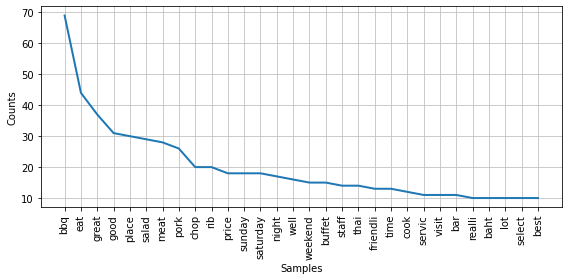

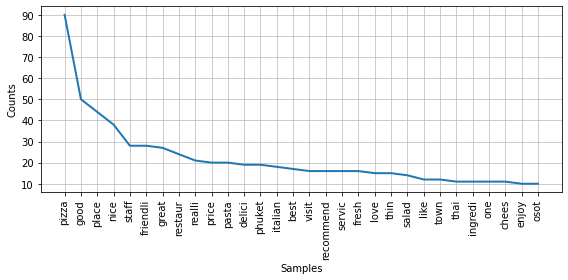

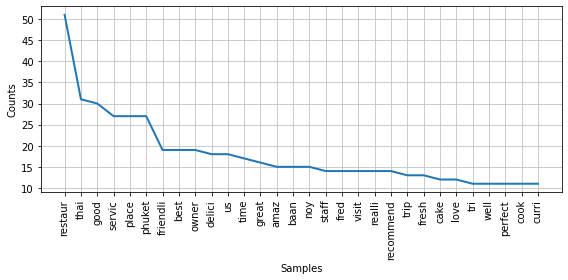

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [116]:
pos_freqdist1.plot(30)
pos_freqdist2.plot(30)
pos_freqdist3.plot(30)

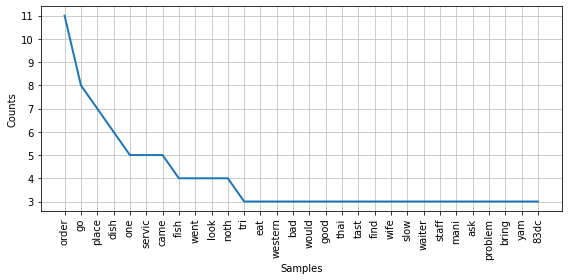

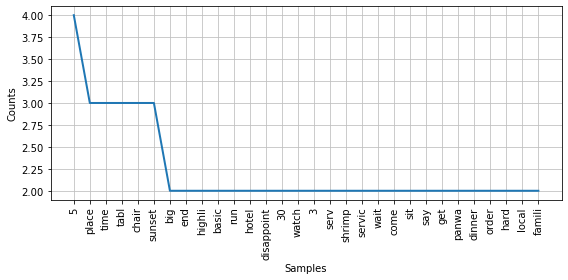

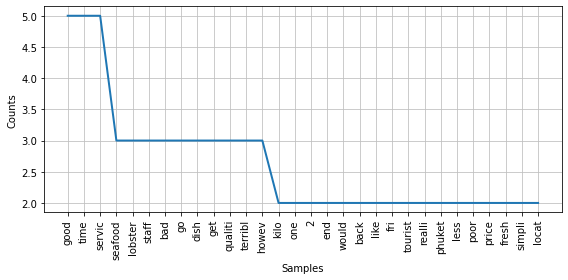

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [117]:

neg_freqdist1.plot(30)
neg_freqdist2.plot(30)
neg_freqdist3.plot(30)

# Classifier (OPTIONAL)

In [ ]:
df1['Review'] = df1['Review'].apply(preprocess_text)

In [ ]:
df1['Review']

In [ ]:
# Generate Term Frequency Matrix

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Review'].map(''.join))
X = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [ ]:
X.head()

In [ ]:
# Split Test Train Data

In [ ]:
from sklearn.model_selection import train_test_split

y = df['Hotel/Restaurant']

X_train,X_test, y_train, y_test = train_test_split(
    X, y, train_size = 0.8, test_size = 0.2, random_state = 99)

In [ ]:
# balancing imbalanced classes

from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state = 0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled, ylab = )


In [ ]:
# Data is ready for training, instantiate the model we are using from Scikit Learn
# Multinomial Naive Bayes classifier, one of the two classifeirs
#used for text classification



In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Now its time to evaluate the training model


y_pred= model.predict(X_test)

# Computing the accuracy and making Confusion Matrix

from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm, "\n\n\n")
print('---------------------------------------------------------')

result = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n\n',)
print(result)

In [ ]:
## Put this down 
print(preprocess_text('This movie is great!'))
print(preprocess_text('This movie is not ggreat'))

In [ ]:
data.describe()